In [8]:
from qaravan.tensorQ import environment_state_prep, random_sv
from qaravan.core import brickwall_skeleton, RunContext, set_style
import matplotlib.pyplot as plt

In [4]:
# Define the problem
n = 4 
target_sv = random_sv(n)

# set up ansatz
num_layers = 2
skeleton = brickwall_skeleton(n, num_layers)

# set up RunContext for logging, checkpointing, and stopping
context = RunContext(
    progress_interval=10,
    max_iter=10000,
    checkpoint_file="checkpoint.pickle",
    checkpoint_interval=100,
    resume=False,
    convergence_check=True,
    stop_ratio=1e-8, 
    stop_absolute=1e-7
)

circ, cost_list = environment_state_prep(target_sv, skeleton=skeleton, context=context)

Step 0 at 2025-05-05T09:52:00 with cost 0.004745163206524516
[Checkpoint saved at step 0]
Absolute stop condition met with cost 5.028770277970551e-08 at step 6


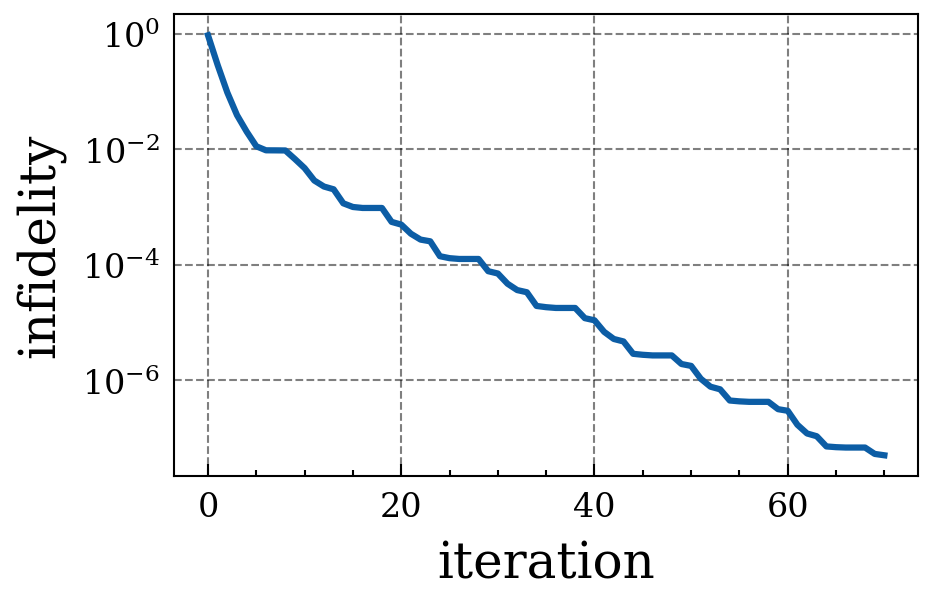

In [9]:
set_style()
fig, ax = plt.subplots(figsize=(3.2,2))
ax.plot(cost_list, lw=1.5, color="C0")
ax.set_xlabel("iteration", fontsize=12)
ax.set_ylabel("infidelity", fontsize=12)
ax.set_yscale("log")